In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

In [6]:
df = pd.read_excel("train.xlsx")

In [8]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.45131,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [9]:
print('Train Data Size : ',df.shape)

Train Data Size :  (100000, 28)


In [10]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [12]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

**Dataset consists of missing values.**

In [13]:
# Drop unnecessary columns
df.drop(["ID","Customer_ID","Name","SSN","Type_of_Loan"],axis=1,inplace=True)

In [14]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

**There are still features that comprise of missing values. The categorical features must be converted to numerical in order to fill missing data**

In [15]:
## Finding the numerical and categorical columns
cat_cols = [feature for feature in df.columns if df[feature].dtypes == 'O']
num_cols = [feature for feature in df.columns if feature not in cat_cols]

In [16]:
## Finding the unique values in each of the categorical feature columns
for feature in cat_cols:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {df[feature].nunique()}")
    print(f"Unique values: {df[feature].unique()}")
    print('\n')

Month:
Number of unique values in the Month: 8
Unique values: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']


Age:
Number of unique values in the Age: 1788
Unique values: [23 -500 '28_' ... '4808_' 2263 1342]


Occupation:
Number of unique values in the Occupation: 16
Unique values: ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']


Annual_Income:
Number of unique values in the Annual_Income: 18940
Unique values: [19114.12 34847.84 '34847.84_' ... 20002.88 39628.99 '39628.99_']


Num_of_Loan:
Number of unique values in the Num_of_Loan: 434
Unique values: [4 1 3 967 -100 0 '0_' 2 '3_' '2_' 7 5 '5_' 6 8 '8_' 9 '9_' '4_' '7_' '1_'
 1464 '6_' 622 352 472 1017 945 146 563 341 444 720 1485 49 737 1106 466
 728 313 843 '597_' 617 119 663 640 '92_' 1019 501 1302 39 716 848 931
 1214 186 424 1001 1110 1152 457 1433 1187 52 1480 1047 1035

In [17]:
df.drop(df[df["Occupation"]=='_______'].index,inplace=True)
df.drop(df[df["Credit_Mix"]=='_'].index,inplace=True)

## Data Encoding (Categorical ---> Numerical)

In [18]:
df["Month"].value_counts()

Month
July        9377
January     9341
March       9325
June        9295
April       9237
February    9210
August      9198
May         9181
Name: count, dtype: int64

<ipython-input-19-f82ae8391dad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Month",data=df,palette="Dark2")


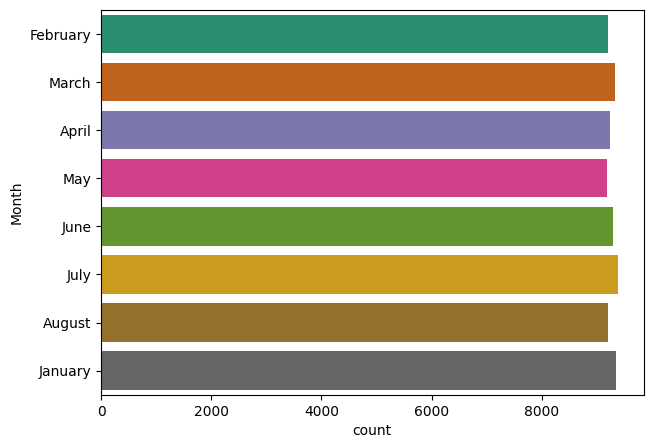

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(y="Month",data=df,palette="Dark2")
plt.show()

In [20]:
month_mapping = {
   'January': 1,
    'February': 2,
    'March': 3,
    "April":4,
    "May":5,
    "June":6,
    "July":7,
    "August":8}
df['Month'] = df['Month'].replace(month_mapping)

In [21]:
df["Occupation"].value_counts()

Occupation
Lawyer           5259
Engineer         5077
Architect        5073
Scientist        5052
Accountant       5042
Mechanic         5001
Media_Manager    4978
Developer        4967
Teacher          4930
Entrepreneur     4911
Journalist       4884
Doctor           4860
Manager          4756
Musician         4702
Writer           4672
Name: count, dtype: int64

<ipython-input-22-616ed9fd27b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Occupation",data=df,palette="Set1")


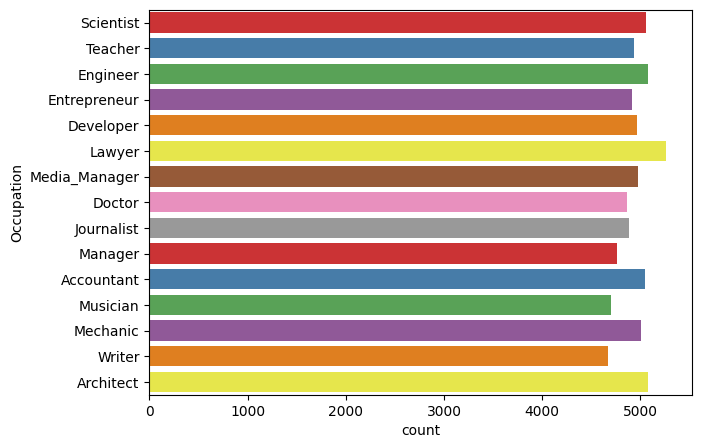

In [22]:
plt.figure(figsize=(7,5))
sns.countplot(y="Occupation",data=df,palette="Set1")
plt.show()

In [23]:
occupation_mapping = {
    'Lawyer': 1,
    'Architect': 2,
    'Engineer': 3,
    'Scientist': 4,
    'Mechanic': 5,
    'Accountant': 6,
    'Developer': 7,
    'Media_Manager': 8,
    'Teacher': 9,
    'Entrepreneur': 10,
    'Doctor': 11,
    'Journalist': 12,
    'Manager': 13,
    'Musician': 14,
    'Writer': 15
}

df['Occupation'] = df['Occupation'].replace(occupation_mapping)


In [24]:
df["Credit_Mix"].value_counts()

Credit_Mix
Standard    33916
Good        22618
Bad         17630
Name: count, dtype: int64

<ipython-input-25-008a466b7af6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Credit_Mix",data=df,palette="inferno")


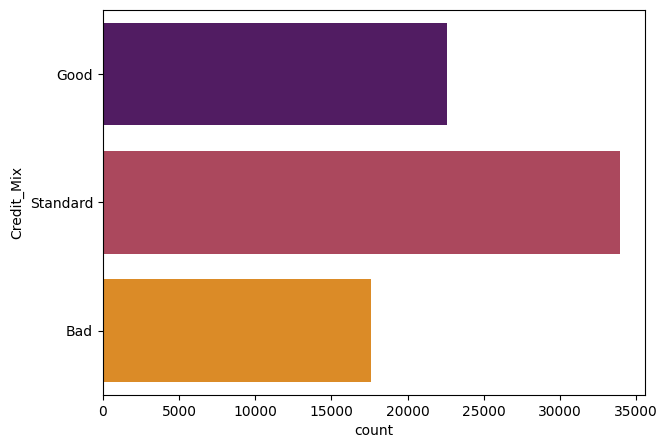

In [25]:
plt.figure(figsize=(7,5))
sns.countplot(y="Credit_Mix",data=df,palette="inferno")
plt.show()

In [26]:
credit_map={"Good":1,"Standard":2,"Bad":3}
df['Credit_Mix'] = df['Credit_Mix'].replace(credit_map)

In [27]:
df["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      18866
High_spent_Medium_value_payments    13075
Low_spent_Medium_value_payments     10304
High_spent_Large_value_payments     10191
High_spent_Small_value_payments      8341
Low_spent_Large_value_payments       7711
!@9#%8                               5676
Name: count, dtype: int64

<ipython-input-28-68a248399392>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Payment_Behaviour",data=df,palette="inferno")


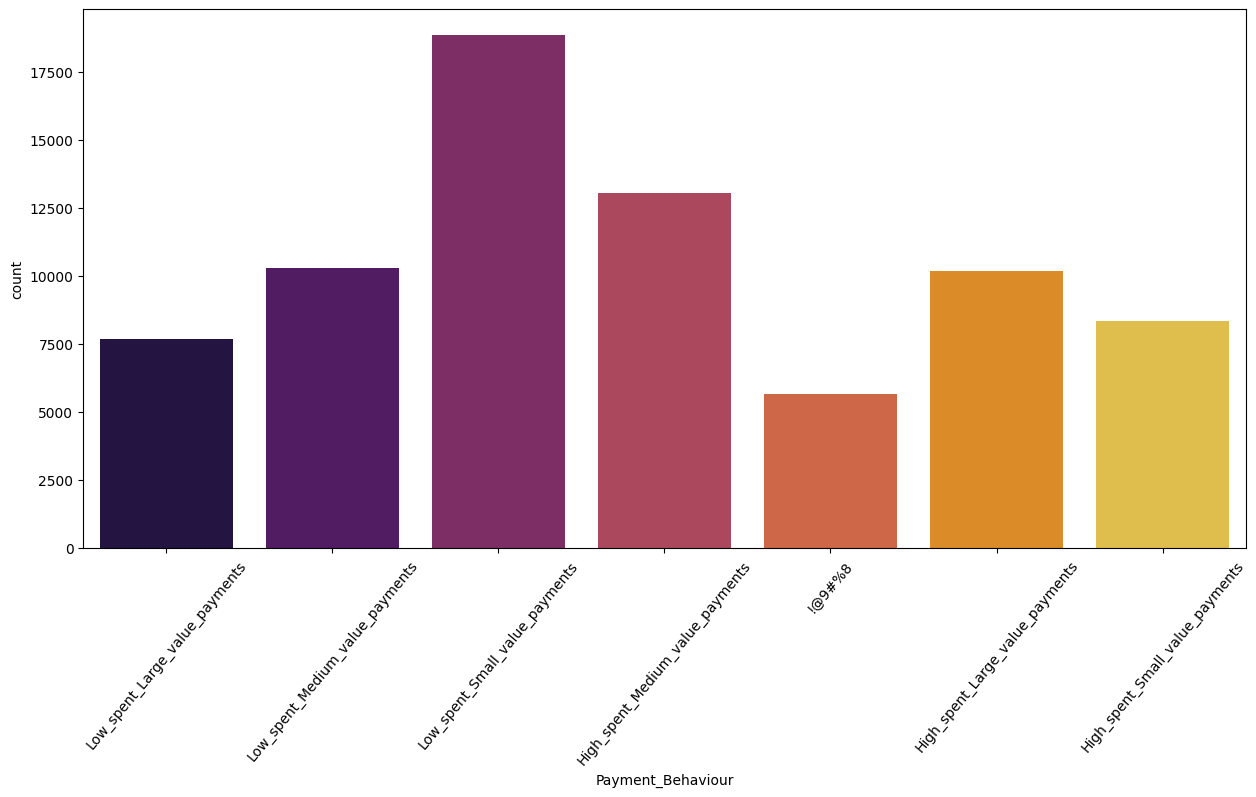

In [28]:
plt.figure(figsize=(15,7))
sns.countplot(x="Payment_Behaviour",data=df,palette="inferno")
plt.xticks(rotation=50)
plt.show()

In [29]:
df['Payment_Behaviour']= df['Payment_Behaviour'].replace("!@9#%8",np.nan)

In [30]:
category_mapping = {
    'Low_spent_Small_value_payments':1,
    'High_spent_Medium_value_payments':2,
    'Low_spent_Medium_value_payments': 3,
    'High_spent_Large_value_payments': 4,
    'High_spent_Small_value_payments': 5,
    'Low_spent_Large_value_payments': 6
}
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace(category_mapping)

In [31]:
df["Payment_of_Min_Amount"].value_counts()

Payment_of_Min_Amount
Yes    38737
No     26501
NM      8926
Name: count, dtype: int64

<ipython-input-32-f4f973a65b4b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Payment_of_Min_Amount",data=df,palette="spring")


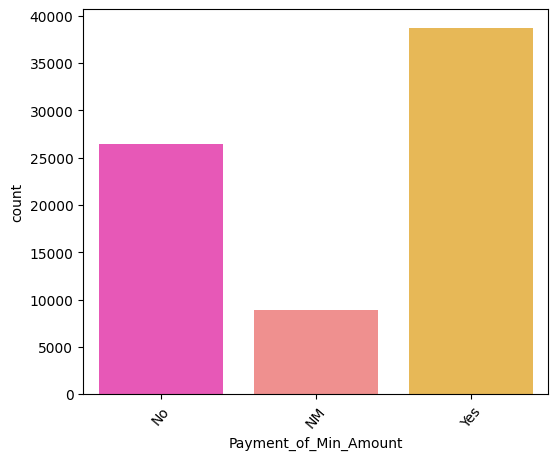

In [32]:
plt.figure(figsize=(6,5))
sns.countplot(x="Payment_of_Min_Amount",data=df,palette="spring")
plt.xticks(rotation=50)
plt.show()

In [33]:
pay_map={"Yes":1,"No":2,"NM":3}
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace(pay_map)

In [34]:
df["Credit_Score"].value_counts()

Credit_Score
Standard    39441
Poor        21509
Good        13214
Name: count, dtype: int64

<ipython-input-35-cbc7685f7655>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_Score",data=df,palette="hot")


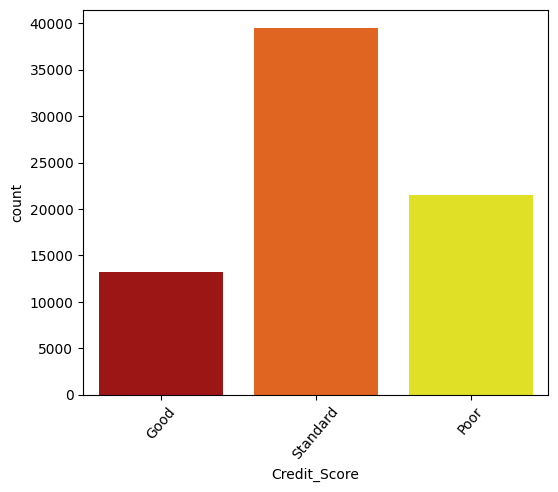

In [35]:
plt.figure(figsize=(6,5))
sns.countplot(x="Credit_Score",data=df,palette="hot")
plt.xticks(rotation=50)
plt.show()

In [36]:
score_map={"Standard":0,"Poor":1,"Good":2}
df['Credit_Score'] = df['Credit_Score'].replace(score_map)

## Handling Missing Data


In [37]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       11112
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       5195
Changed_Credit_Limit            0
Num_Credit_Inquiries         1472
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           6717
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3356
Payment_Behaviour            5676
Monthly_Balance               906
Credit_Score                    0
dtype: int64

In [38]:
mean_salary = df["Monthly_Inhand_Salary"].mean()
df["Monthly_Inhand_Salary"].fillna(mean_salary, inplace=True)

In [39]:
df["Num_of_Delayed_Payment"] = pd.to_numeric(df["Num_of_Delayed_Payment"], errors="coerce")
n_mean=df["Num_of_Delayed_Payment"].mean()
df["Num_of_Delayed_Payment"].fillna(n_mean, inplace=True)

In [40]:
in_mean=df["Num_Credit_Inquiries"].mean()
df["Num_Credit_Inquiries"].fillna(in_mean, inplace=True)

In [41]:
df['Credit_History_Age'] = df['Credit_History_Age'].str.extract(r'(\d+)')

In [42]:
df["Credit_History_Age"] = pd.to_numeric(df["Credit_History_Age"], errors="coerce")
credit_mean=df["Credit_History_Age"].mean()
df["Credit_History_Age"].fillna(credit_mean, inplace=True)

In [43]:
df["Amount_invested_monthly"] = pd.to_numeric(df["Amount_invested_monthly"], errors="coerce")
invest_mean=df["Amount_invested_monthly"].mean()
df["Amount_invested_monthly"].fillna(invest_mean, inplace=True)

In [44]:
df.dropna(subset=["Payment_Behaviour"], inplace=True)

In [45]:
df["Monthly_Balance"] = pd.to_numeric(df["Monthly_Balance"], errors="coerce")
month_mean=df["Monthly_Balance"].mean()
df["Monthly_Balance"].fillna(month_mean, inplace=True)

In [46]:
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

**All missing values have been handled**

In [47]:
df["Annual_Income"] = pd.to_numeric(df["Annual_Income"], errors="coerce")
an_mean=df["Annual_Income"].mean()
df["Annual_Income"].fillna(an_mean, inplace=True)

In [48]:
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True), errors='coerce')

In [49]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_',np.nan)  # Replace '_' with 0
df["Changed_Credit_Limit"] = pd.to_numeric(df["Changed_Credit_Limit"], errors="coerce")
c_mean=df["Changed_Credit_Limit"].mean()
df["Changed_Credit_Limit"].fillna(c_mean, inplace=True)

In [50]:
df['Age'] = df['Age'].replace('-500',np.nan)
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
age_mean=df["Age"].mean()
df["Age"].fillna(age_mean, inplace=True)

In [51]:
df["Num_of_Loan"] = pd.to_numeric(df["Num_of_Loan"], errors="coerce")
num_mean=df["Num_of_Loan"].mean()
df["Num_of_Loan"].fillna(num_mean, inplace=True)

In [52]:
df['Delay_from_due_date'] = df['Delay_from_due_date'].abs()

## Data Visualization

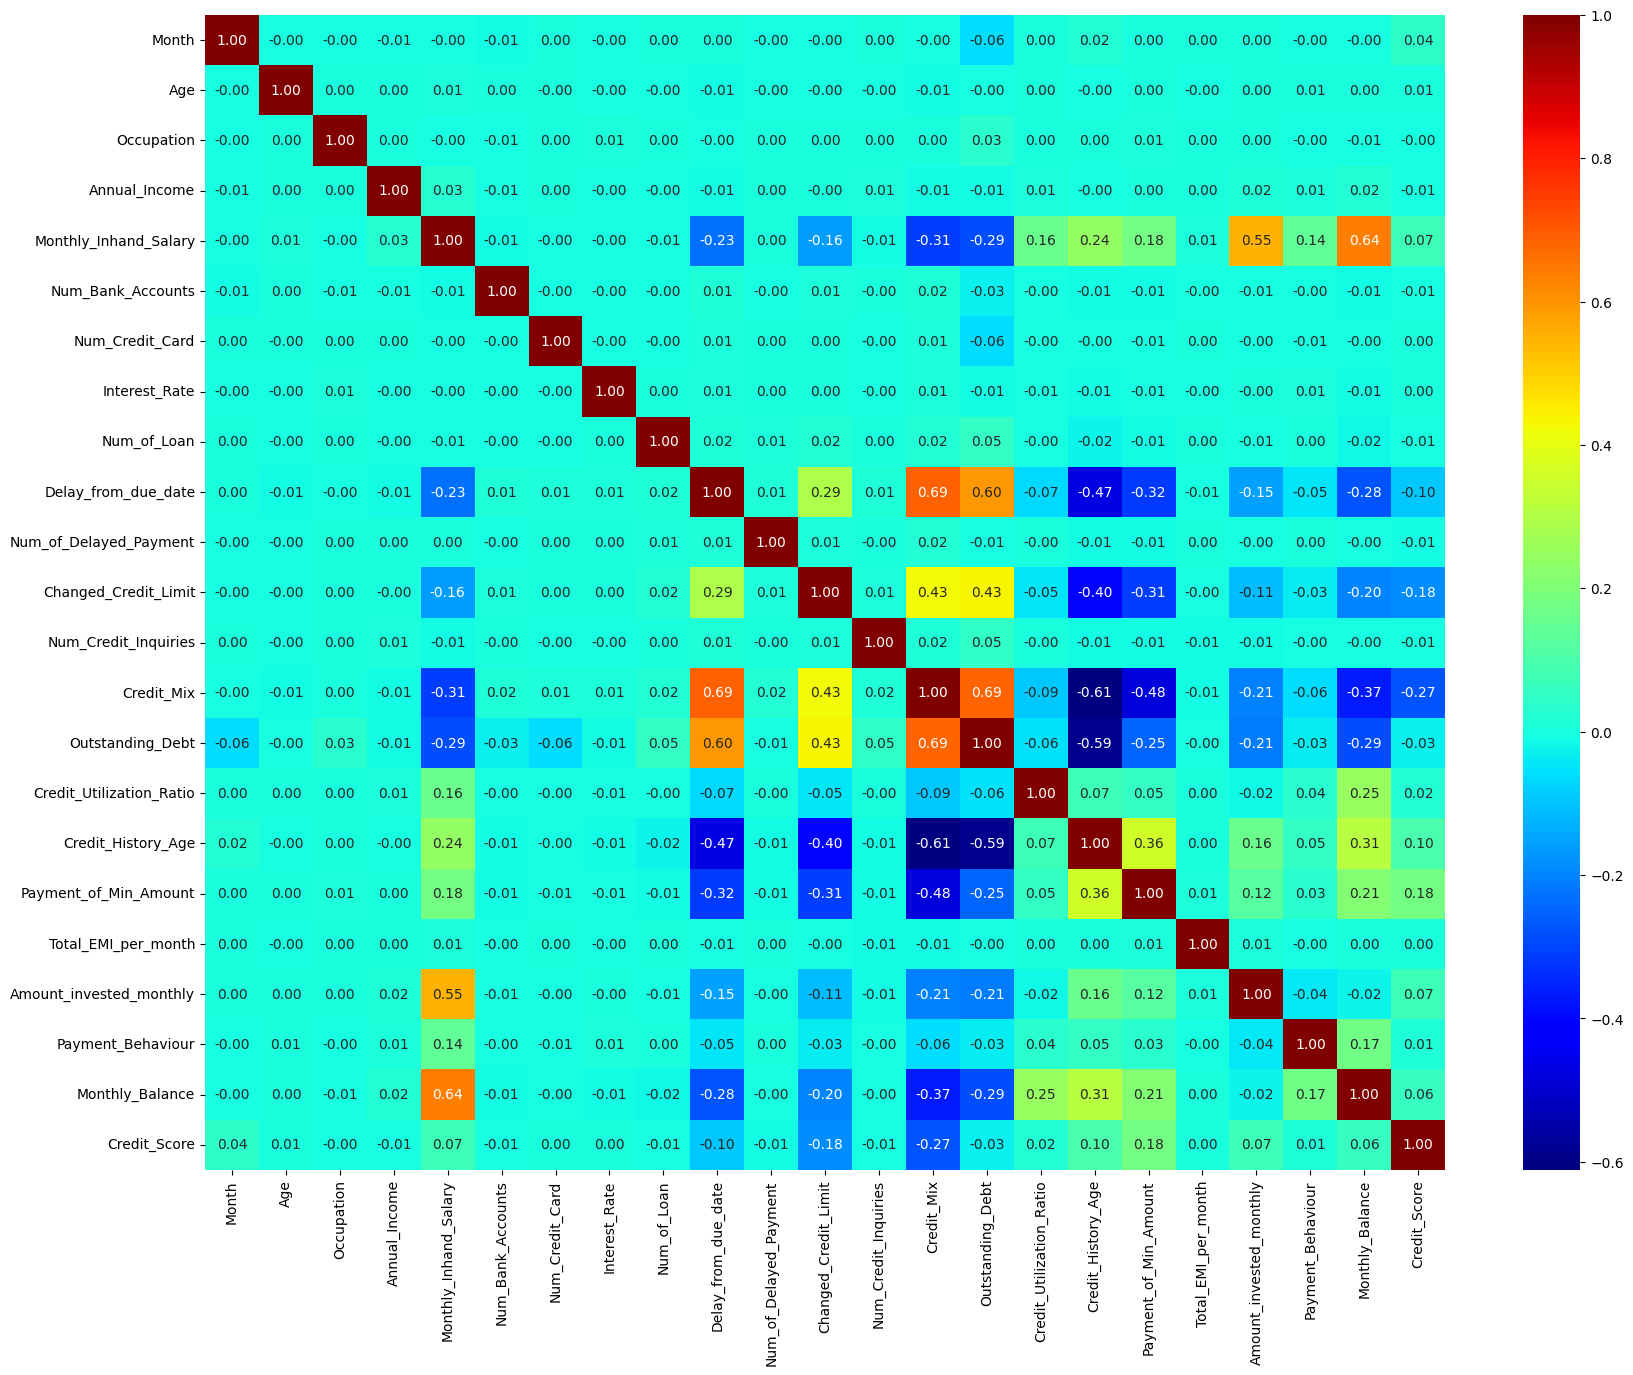

In [53]:
cr=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cr,annot=True,fmt=".2f",cmap="jet")
plt.show()

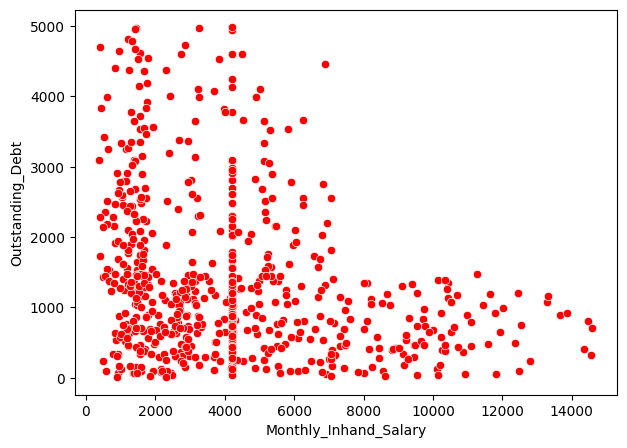

In [54]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Monthly_Inhand_Salary", y="Outstanding_Debt",color="red")
plt.show()

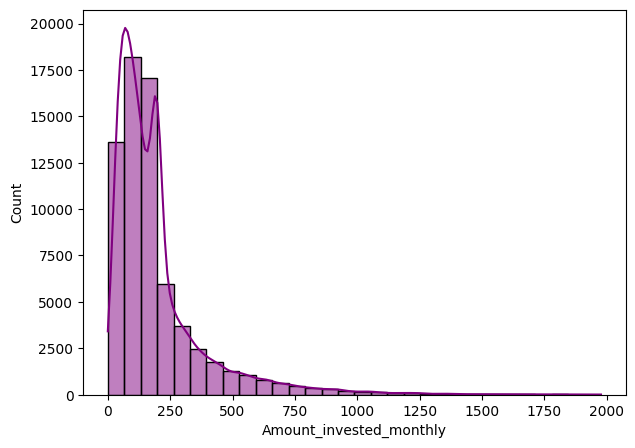

In [55]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="Amount_invested_monthly", kde=True,bins=30,color="purple")
plt.show()

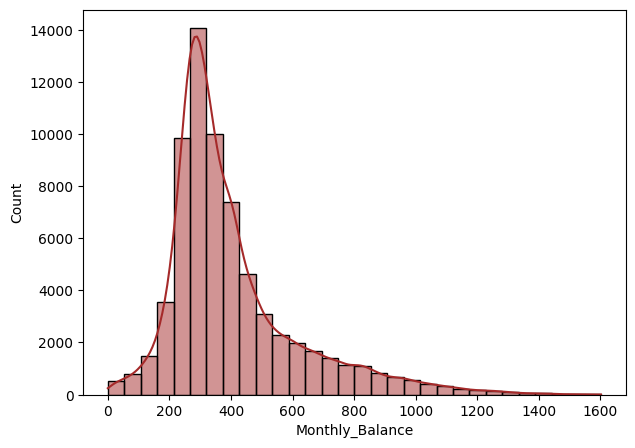

In [56]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="Monthly_Balance", kde=True,bins=30,color="brown")
plt.show()

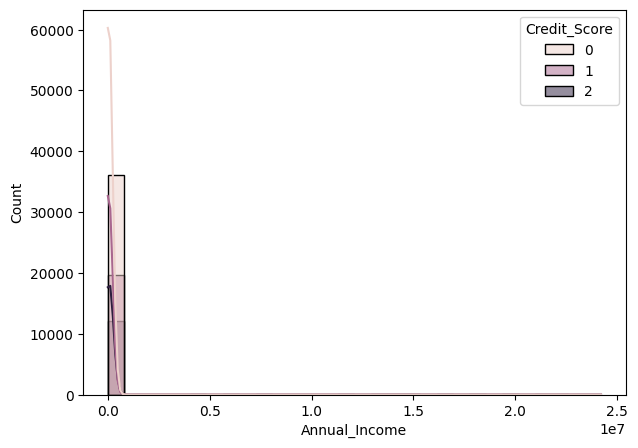

In [57]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="Annual_Income", kde=True,bins=30,hue="Credit_Score")
plt.show()

## Data Scaling


In [58]:
columns_to_scale = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt','Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
                    'Amount_invested_monthly', 'Monthly_Balance']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [59]:
x=df.drop("Credit_Score",axis=1)
y=df["Credit_Score"]

In [60]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

## Model Training

We will be training the dataset on 2 different models:

1.   Extreme Gradient Boosting Classifier
2.   Light Gradient Boosting Machine



In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


### Extreme Gradient Boosting Classifier

In [62]:
xgb_classifier = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100,eval_metric='logloss', objective='binary:logistic', booster='gbtree')
xgb_classifier.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [63]:
pred=xgb_classifier.predict(xtest)
xgb_ac=accuracy_score(ytest,pred)
print("XGB Accuracy Score :",xgb_ac)

XGB Accuracy Score : 0.6965980435100014


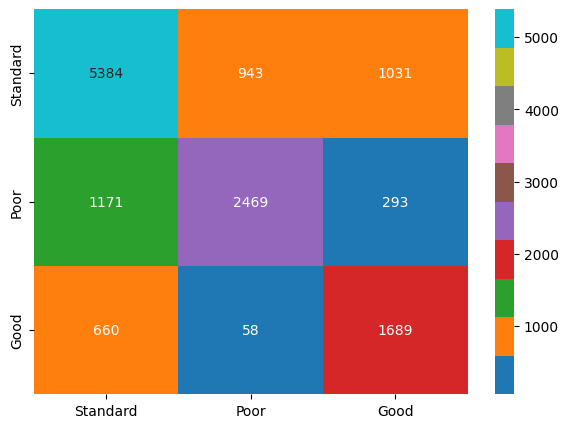

In [64]:
cf_mat=confusion_matrix(ytest, pred)
label_name=["Standard","Poor","Good"]
plt.figure(figsize=(7,5))

sns.heatmap(cf_mat,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name,cmap="tab10")
plt.show()

In [65]:
print(classification_report(ytest,pred,target_names=label_name))

              precision    recall  f1-score   support

    Standard       0.75      0.73      0.74      7358
        Poor       0.71      0.63      0.67      3933
        Good       0.56      0.70      0.62      2407

    accuracy                           0.70     13698
   macro avg       0.67      0.69      0.68     13698
weighted avg       0.70      0.70      0.70     13698



In [66]:
x_loss=xgb_classifier.predict_proba(xtest)
logloss = log_loss(ytest,x_loss)
print("Log Loss:", logloss)

Log Loss: 0.668454262045852


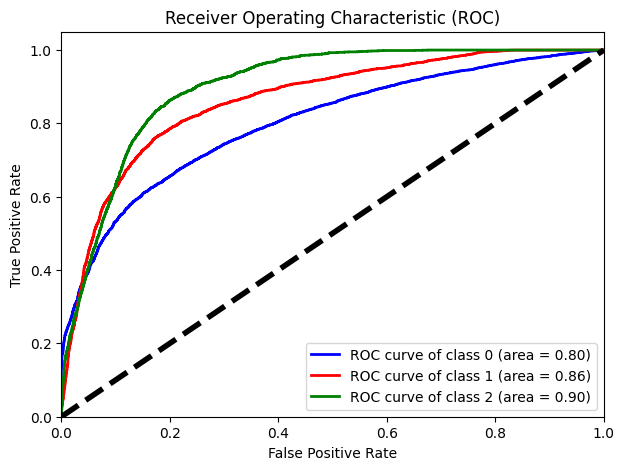

In [67]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = 3  # Number of classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest,x_loss[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(7,5))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', linestyle='--',lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


### LightGBM (Light Gradient Boosting Machine)

In [68]:
lgb_classifier = LGBMClassifier(boosting_type='gbdt', num_leaves=31,max_depth=-1,learning_rate=0.1,
                                n_estimators=100,

                                random_state=42,
                                objective='multiclass',  # Multi-class objective
                                metric='multi_logloss')

In [69]:
lgb_classifier.fit(xtrain, ytrain, eval_set=[(xtest, ytest)])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3714
[LightGBM] [Info] Number of data points in the train set: 54790, number of used features: 22
[LightGBM] [Info] Start training from score -0.633113
[LightGBM] [Info] Start training from score -1.235680
[LightGBM] [Info] Start training from score -1.723577


LGBMClassifier(metric='multi_logloss', objective='multiclass', random_state=42)

In [70]:
pred0=lgb_classifier.predict(xtest)
acc0=accuracy_score(ytest,pred0)
print("accuracy score :",acc0)

accuracy score : 0.7241933128923931


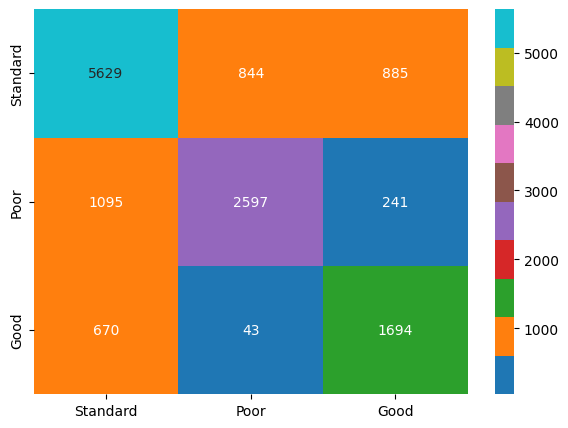

In [71]:
cf_mat=confusion_matrix(ytest, pred0)
label_name=["Standard","Poor","Good"]
plt.figure(figsize=(7,5))
sns.heatmap(cf_mat,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name,cmap="tab10")
plt.show()

In [72]:
print(classification_report(ytest,pred0,target_names=label_name))

              precision    recall  f1-score   support

    Standard       0.76      0.77      0.76      7358
        Poor       0.75      0.66      0.70      3933
        Good       0.60      0.70      0.65      2407

    accuracy                           0.72     13698
   macro avg       0.70      0.71      0.70     13698
weighted avg       0.73      0.72      0.72     13698



In [73]:
lgb=lgb_classifier.predict_proba(xtest)
logloss2 = log_loss(ytest,lgb)
print("Log Loss:", logloss2)

Log Loss: 0.6194008614086293


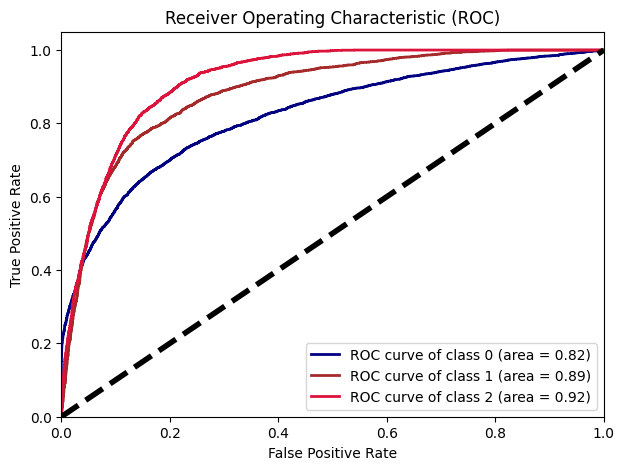

In [74]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = 3  # Number of classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest,lgb[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(7,5))
colors = ['navy', 'brown', 'crimson']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', linestyle='--',lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## Model Evaluation

<ipython-input-75-de8547a37b67>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Model', x='Accuracy', data=results_df, palette='viridis')


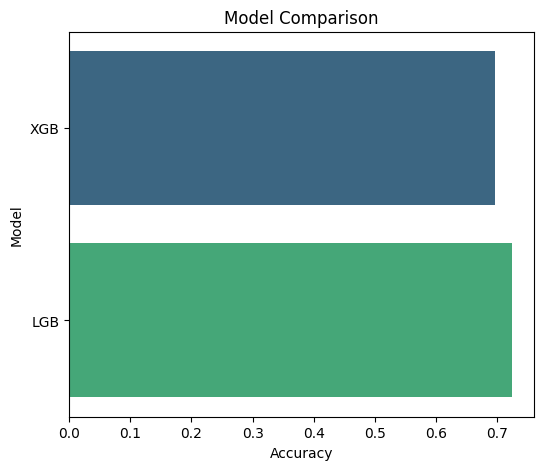

In [75]:
results = {'XGB': xgb_ac,'LGB': acc0}
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
plt.figure(figsize=(6,5))
sns.barplot(y='Model', x='Accuracy', data=results_df, palette='viridis')
plt.title('Model Comparison')
plt.show()


<ipython-input-76-9b94bc6a6496>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Model', x='Log Loss', data=log_loss_df, palette='viridis')


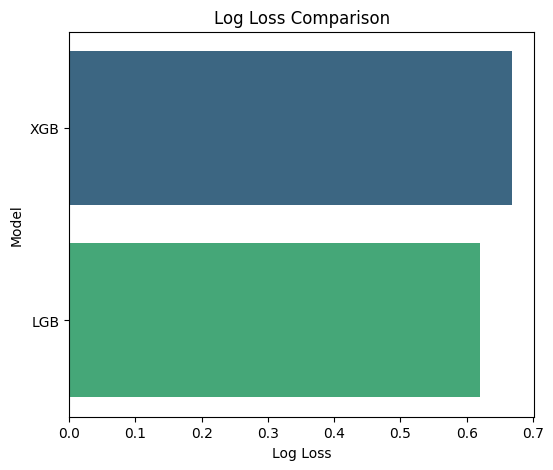

In [76]:
log_loss_results = {'XGB': logloss, 'LGB': logloss2}
log_loss_df = pd.DataFrame(list(log_loss_results.items()), columns=['Model', 'Log Loss'])
plt.figure(figsize=(6,5))
sns.barplot(y='Model', x='Log Loss', data=log_loss_df, palette='viridis')
plt.title('Log Loss Comparison')
plt.show()


In [77]:
from xgboost import XGBClassifier
import joblib

# Assuming you have your trained XGBoost model in the xgb_classifier variable
xgb_classifier = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, eval_metric='logloss', objective='binary:logistic', booster='gbtree')
xgb_classifier.fit(xtrain, ytrain)  # Train the model, replace with your actual training data

# Save the model as a pkl file
model_filename = "xgb_model.pkl"
joblib.dump(xgb_classifier, model_filename)

print(f"XGBoost model saved as {model_filename}")


XGBoost model saved as xgb_model.pkl


### **Hence, LGBM is the most feasible model to train this dataset.**

## Model Saving

In [78]:
from lightgbm import LGBMClassifier
import joblib

# Assuming you have your trained LGBMClassifier in the lgb_classifier variable
lgb_classifier = LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42,
    objective='multiclass',  # Multi-class objective
    metric='multi_logloss'
)

# Train the model (replace with your actual training data)
lgb_classifier.fit(xtrain, ytrain)

# Save the LGBMClassifier as a pkl file
model_filename = "lgb_model.pkl"
joblib.dump(lgb_classifier, model_filename)

print(f"LGBMClassifier model saved as {model_filename}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3714
[LightGBM] [Info] Number of data points in the train set: 54790, number of used features: 22
[LightGBM] [Info] Start training from score -0.633113
[LightGBM] [Info] Start training from score -1.235680
[LightGBM] [Info] Start training from score -1.723577
LGBMClassifier model saved as lgb_model.pkl
